In [1]:
import pandas as pd

df = pd.read_csv('/content/iris.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Task
Clean and reprocess the `df` DataFrame and display its first few rows.

## Cleaning Data

### Subtask:
Perform necessary data cleaning operations, such as handling missing values, removing duplicates, or correcting inconsistencies in the `df` DataFrame.


**Reasoning**:
The first step in data cleaning is to check for missing values in the DataFrame to understand their presence and distribution.



In [2]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


**Reasoning**:
After checking for missing values, the next logical step in data cleaning is to check for duplicate rows to ensure data uniqueness.



In [3]:
print("Duplicate rows:")
print(df.duplicated().sum())

Duplicate rows:
3


**Reasoning**:
Since duplicate rows were found in the previous step, the next step is to remove these duplicate rows from the DataFrame to ensure data uniqueness and consistency.



In [4]:
df.drop_duplicates(inplace=True)
print("Duplicate rows after removal:")
print(df.duplicated().sum())

Duplicate rows after removal:
0


**Reasoning**:
After handling missing values and removing duplicate rows, the next step in data cleaning is to inspect the data types of each column to ensure they are appropriate and consistent with the data they contain.



In [5]:
print("Data types of each column:")
df.info()

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


## Reprocessing Data

### Subtask:
Apply any required data reprocessing steps, which might include data type conversions, feature engineering, or transformations on the `df` DataFrame.


**Reasoning**:
The subtask requires converting the 'species' column into numerical representations using one-hot encoding. `pd.get_dummies()` is the appropriate function for this, and setting `drop_first=True` helps avoid multicollinearity. After encoding, the original 'species' column should be dropped and the new columns merged into the DataFrame.



In [6]:
df = pd.get_dummies(df, columns=['species'], drop_first=True)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0           5.1          3.5           1.4          0.2               False   
1           4.9          3.0           1.4          0.2               False   
2           4.7          3.2           1.3          0.2               False   
3           4.6          3.1           1.5          0.2               False   
4           5.0          3.6           1.4          0.2               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  


## Final Task

### Subtask:
Summarize the cleaning and reprocessing steps performed and display the first few rows of the updated `df` DataFrame to confirm the changes.


## Summary:

### Q&A
*   **What cleaning steps were performed on the `df` DataFrame?**
    The cleaning steps involved checking for missing values, identifying and removing duplicate rows.
*   **What reprocessing steps were performed on the `df` DataFrame?**
    The reprocessing step involved converting the categorical 'species' column into numerical representations using one-hot encoding.
*   **What does the updated `df` DataFrame look like after these operations?**
    The updated `df` DataFrame now contains the original numerical columns (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) and two new boolean columns, `species_versicolor` and `species_virginica`, which are the result of one-hot encoding the 'species' column. The original 'species' column has been removed.

### Data Analysis Key Findings
*   Initially, the `df` DataFrame had no missing values across any columns.
*   Three duplicate rows were identified and subsequently removed from the DataFrame, resulting in a clean DataFrame with 147 entries.
*   The data types for `sepal_length`, `sepal_width`, `petal_length`, and `petal_width` were confirmed to be `float64`, and 'species' was `object`, all appropriate for their respective data.
*   The categorical 'species' column was successfully transformed into numerical features using one-hot encoding, creating `species_versicolor` and `species_virginica` columns, with `drop_first=True` applied to prevent multicollinearity.

### Insights or Next Steps
*   The `df` DataFrame is now clean and prepared for machine learning tasks, with all categorical features appropriately encoded into numerical format.
*   The next logical step would be to proceed with model training, where these preprocessed features can be used to predict an outcome or perform clustering, depending on the specific analytical goal.


# Task
Normalize the numerical features in the `df` DataFrame and prepare the data for training a C4.5 model.

## Normalize Data

### Subtask:
Normalize the numerical features in the `df` DataFrame.


**Reasoning**:
To normalize the numerical features, first import `MinMaxScaler`, identify the target columns, initialize the scaler, apply `fit_transform` to normalize the data, update the DataFrame, and then display the head to confirm.



In [7]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to normalize
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to numerical columns and update the DataFrame
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after normalization:")
print(df.head())

DataFrame after normalization:
   sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0      0.222222     0.625000      0.067797     0.041667               False   
1      0.166667     0.416667      0.067797     0.041667               False   
2      0.111111     0.500000      0.050847     0.041667               False   
3      0.083333     0.458333      0.084746     0.041667               False   
4      0.194444     0.666667      0.067797     0.041667               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  


## Prepare Data for C4.5 Model

### Subtask:
Split the preprocessed `df` DataFrame into features (X) and target (y). Then, divide the dataset into training and testing sets to prepare for model building and evaluation.


**Reasoning**:
To prepare the data for model training, I will first define the feature matrix `X` using the normalized numerical columns. Then, I will reconstruct the categorical target variable `y` from the one-hot encoded species columns. Finally, I will split `X` and `y` into training and testing sets using `train_test_split` to ensure a reproducible and valid evaluation process.



In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Define the feature matrix X
X = df[numerical_cols]

# 2. Reconstruct the target variable y
conditions = [
    df['species_versicolor'] == True,
    df['species_virginica'] == True
]
choices = ['versicolor', 'virginica']

y = np.select(conditions, choices, default='setosa')
y = pd.Series(y, index=df.index, name='species') # Convert to Series with proper index and name

# 3 & 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train:\n", X_train.head())
print("\nFirst 5 rows of y_train:\n", y_train.head())

Shape of X_train: (102, 4)
Shape of X_test: (45, 4)
Shape of y_train: (102,)
Shape of y_test: (45,)

First 5 rows of X_train:
      sepal_length  sepal_width  petal_length  petal_width
95       0.388889     0.416667      0.542373     0.458333
143      0.694444     0.500000      0.830508     0.916667
110      0.611111     0.500000      0.694915     0.791667
0        0.222222     0.625000      0.067797     0.041667
75       0.638889     0.416667      0.576271     0.541667

First 5 rows of y_train:
 95     versicolor
143     virginica
110     virginica
0          setosa
75     versicolor
Name: species, dtype: object


## Train C4.5 Model

### Subtask:
Train a Decision Tree Classifier (which implements algorithms similar to C4.5) using the training data. This will involve importing the necessary library and fitting the model.


**Reasoning**:
To train a C4.5-like Decision Tree model, I will import `DecisionTreeClassifier` from `sklearn.tree`, instantiate it with `random_state=42` for reproducibility, and then fit it to the `X_train` and `y_train` datasets.



In [9]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifier with random_state for reproducibility
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Visualize Decision Tree

### Subtask:
Generate a visualization of the trained Decision Tree. This will help in understanding the decision rules learned by the model. Provide appropriate labels and legends for clarity.


**Reasoning**:
To visualize the trained Decision Tree, I need to import the necessary plotting functions, prepare the feature and class names, and then use `plot_tree` to render the tree, ensuring clarity with appropriate labels and title.



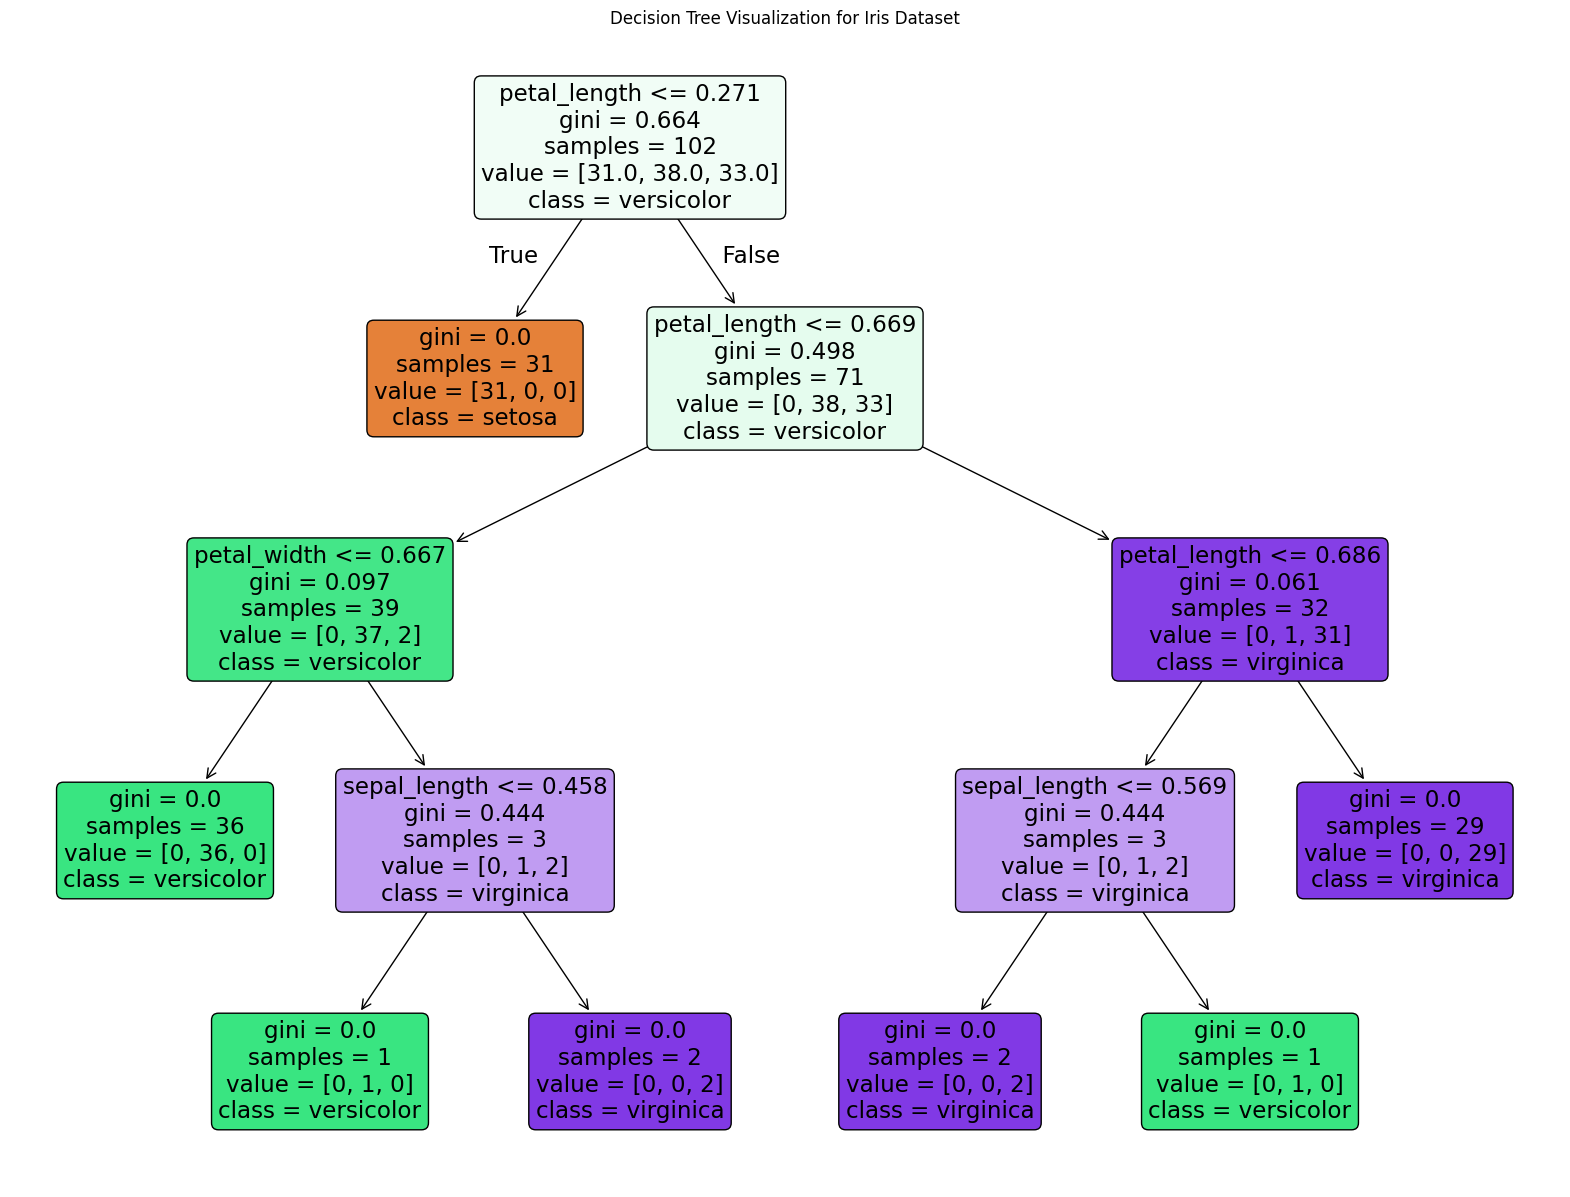

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)

# Get feature names from X_train columns
feature_names = X_train.columns.tolist()

# Get class names from y unique values
class_names = y.unique().tolist()

# Plot the decision tree
plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          ax=ax)

plt.title("Decision Tree Visualization for Iris Dataset")
plt.show()

## Final Task

### Subtask:
Summarize the data normalization process, the C4.5 model training, and interpret the visualized decision tree, along with any key findings.


## Summary:

### Data Analysis Key Findings

*   **Data Normalization**: Numerical features ('sepal\_length', 'sepal\_width', 'petal\_length', 'petal\_width') were successfully normalized using `MinMaxScaler`, scaling their values to a range between 0 and 1.
*   **Data Preparation**: The dataset was prepared by defining feature matrix `X` from the normalized numerical columns and reconstructing the target variable `y` ('setosa', 'versicolor', 'virginica'). The data was then split into training and testing sets, with 102 samples for training (`X_train`, `y_train`) and 45 samples for testing (`X_test`, `y_test`), using a 70/30 split ratio.
*   **C4.5 Model Training**: A `DecisionTreeClassifier` (an algorithm similar to C4.5) was successfully trained on the preprocessed training data (`X_train`, `y_train`).
*   **Decision Tree Visualization**: A visual representation of the trained decision tree was generated, clearly showing the decision rules, feature names, and class names, aiding in understanding the model's logic.

### Insights or Next Steps

*   The trained Decision Tree model is now ready for evaluation using the test set (`X_test`, `y_test`) to assess its performance metrics such as accuracy, precision, and recall.
*   A detailed interpretation of the visualized decision tree is crucial to understand the specific rules and thresholds the model uses to classify different species, which can provide domain-specific insights into the Iris dataset.
